In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

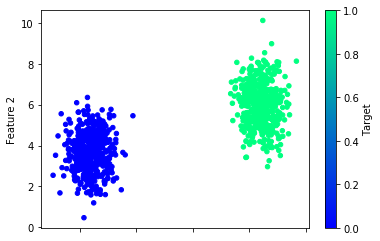

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")


In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer
nn_model.add(tf.keras.layers.Dense(units=1,activation="relu",input_dim=2))

In [7]:
# add output layer using probability activation fn
nn_model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [8]:
# Check structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# compile and customize metrics
nn_model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [10]:
# fit the model to training
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 655us/sample - loss: 0.4131 - accuracy: 0.9947
Epoch 2/100
750/750 [==============================] - 0s 26us/sample - loss: 0.4032 - accuracy: 0.9947
Epoch 3/100
750/750 [==============================] - 0s 25us/sample - loss: 0.3937 - accuracy: 0.9947
Epoch 4/100
750/750 [==============================] - 0s 24us/sample - loss: 0.3846 - accuracy: 0.9947
Epoch 5/100
750/750 [==============================] - 0s 24us/sample - loss: 0.3758 - accuracy: 0.9947
Epoch 6/100
750/750 [==============================] - 0s 24us/sample - loss: 0.3674 - accuracy: 0.9947
Epoch 7/100
750/750 [==============================] - 0s 25us/sample - loss: 0.3593 - accuracy: 0.9947
Epoch 8/100
750/750 [==============================] - 0s 27us/sample - loss: 0.3514 - accuracy: 0.9947
Epoch 9/100
750/750 [==============================] - 0s 24us/sample - loss: 0.3438 - accuracy: 0.9947
Epoch 10/100
750/750 [====================

750/750 [==============================] - 0s 24us/sample - loss: 0.1020 - accuracy: 1.0000
Epoch 79/100
750/750 [==============================] - 0s 25us/sample - loss: 0.1005 - accuracy: 1.0000
Epoch 80/100
750/750 [==============================] - 0s 24us/sample - loss: 0.0991 - accuracy: 1.0000
Epoch 81/100
750/750 [==============================] - 0s 24us/sample - loss: 0.0976 - accuracy: 1.0000
Epoch 82/100
750/750 [==============================] - 0s 24us/sample - loss: 0.0962 - accuracy: 1.0000
Epoch 83/100
750/750 [==============================] - 0s 23us/sample - loss: 0.0948 - accuracy: 1.0000
Epoch 84/100
750/750 [==============================] - 0s 24us/sample - loss: 0.0935 - accuracy: 1.0000
Epoch 85/100
750/750 [==============================] - 0s 24us/sample - loss: 0.0921 - accuracy: 1.0000
Epoch 86/100
750/750 [==============================] - 0s 24us/sample - loss: 0.0908 - accuracy: 1.0000
Epoch 87/100
750/750 [==============================] - 0s 25us/samp

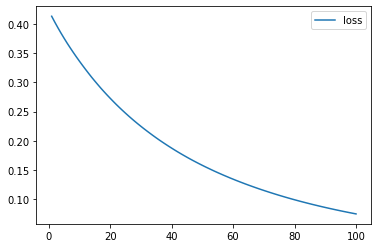

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

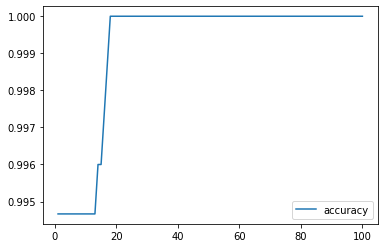

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [14]:
# evaluate model on test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/250 - 0s - loss: 0.0701 - accuracy: 1.0000
Loss: 0.07006011235713959, Accuracy: 1.0


In [16]:
# predict the classification
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2,random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

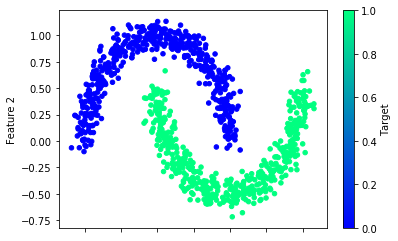

In [17]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [18]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [19]:
# train the model with moon data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 306us/sample - loss: 1.1705 - accuracy: 0.4987
Epoch 2/100
750/750 [==============================] - 0s 27us/sample - loss: 0.9950 - accuracy: 0.5240
Epoch 3/100
750/750 [==============================] - 0s 25us/sample - loss: 0.8866 - accuracy: 0.5533
Epoch 4/100
750/750 [==============================] - 0s 26us/sample - loss: 0.8180 - accuracy: 0.5733
Epoch 5/100
750/750 [==============================] - 0s 25us/sample - loss: 0.7676 - accuracy: 0.5893
Epoch 6/100
750/750 [==============================] - 0s 24us/sample - loss: 0.7306 - accuracy: 0.6027
Epoch 7/100
750/750 [==============================] - 0s 24us/sample - loss: 0.7008 - accuracy: 0.6147
Epoch 8/100
750/750 [==============================] - 0s 25us/sample - loss: 0.6762 - accuracy: 0.6267
Epoch 9/100
750/750 [==============================] - 0s 24us/sample - loss: 0.6551 - accuracy: 0.6387
Epoch 10/100
750/750 [====================

750/750 [==============================] - 0s 25us/sample - loss: 0.2777 - accuracy: 0.8933
Epoch 79/100
750/750 [==============================] - 0s 25us/sample - loss: 0.2770 - accuracy: 0.8933
Epoch 80/100
750/750 [==============================] - 0s 25us/sample - loss: 0.2764 - accuracy: 0.8933
Epoch 81/100
750/750 [==============================] - 0s 24us/sample - loss: 0.2758 - accuracy: 0.8933
Epoch 82/100
750/750 [==============================] - 0s 24us/sample - loss: 0.2752 - accuracy: 0.8933
Epoch 83/100
750/750 [==============================] - 0s 24us/sample - loss: 0.2747 - accuracy: 0.8920
Epoch 84/100
750/750 [==============================] - 0s 23us/sample - loss: 0.2741 - accuracy: 0.8920
Epoch 85/100
750/750 [==============================] - 0s 25us/sample - loss: 0.2736 - accuracy: 0.8920
Epoch 86/100
750/750 [==============================] - 0s 27us/sample - loss: 0.2731 - accuracy: 0.8920
Epoch 87/100
750/750 [==============================] - 0s 27us/samp

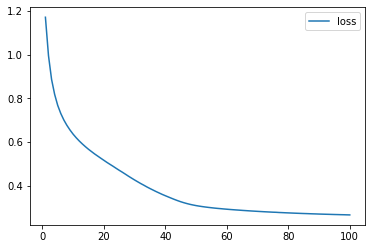

In [20]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

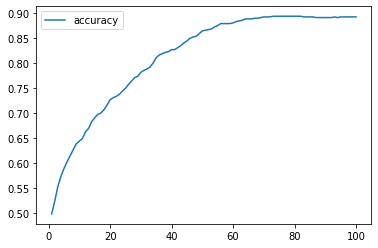

In [21]:
# Plot the loss
history_df.plot(y="accuracy")

In [22]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [23]:
# add the input and hidden layers
num_inputs = 2
num_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=num_hidden_nodes, activation="relu", input_dim=num_inputs))

# add the output layer
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [24]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [25]:
# compile and customize metrics
new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

# fit to moon training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 441us/sample - loss: 0.6734 - accuracy: 0.4213
Epoch 2/100
750/750 [==============================] - 0s 27us/sample - loss: 0.6311 - accuracy: 0.6000
Epoch 3/100
750/750 [==============================] - 0s 25us/sample - loss: 0.5952 - accuracy: 0.7893
Epoch 4/100
750/750 [==============================] - 0s 25us/sample - loss: 0.5632 - accuracy: 0.8133
Epoch 5/100
750/750 [==============================] - 0s 26us/sample - loss: 0.5346 - accuracy: 0.8320
Epoch 6/100
750/750 [==============================] - 0s 25us/sample - loss: 0.5091 - accuracy: 0.8413
Epoch 7/100
750/750 [==============================] - 0s 25us/sample - loss: 0.4860 - accuracy: 0.8507
Epoch 8/100
750/750 [==============================] - 0s 24us/sample - loss: 0.4647 - accuracy: 0.8520
Epoch 9/100
750/750 [==============================] - 0s 25us/sample - loss: 0.4459 - accuracy: 0.8560
Epoch 10/100
750/750 [====================

750/750 [==============================] - 0s 24us/sample - loss: 0.2326 - accuracy: 0.9000
Epoch 79/100
750/750 [==============================] - 0s 25us/sample - loss: 0.2319 - accuracy: 0.9000
Epoch 80/100
750/750 [==============================] - 0s 25us/sample - loss: 0.2314 - accuracy: 0.9000
Epoch 81/100
750/750 [==============================] - 0s 27us/sample - loss: 0.2304 - accuracy: 0.9013
Epoch 82/100
750/750 [==============================] - 0s 25us/sample - loss: 0.2298 - accuracy: 0.9013
Epoch 83/100
750/750 [==============================] - 0s 25us/sample - loss: 0.2292 - accuracy: 0.9013
Epoch 84/100
750/750 [==============================] - 0s 25us/sample - loss: 0.2284 - accuracy: 0.9027
Epoch 85/100
750/750 [==============================] - 0s 24us/sample - loss: 0.2279 - accuracy: 0.9013
Epoch 86/100
750/750 [==============================] - 0s 27us/sample - loss: 0.2270 - accuracy: 0.9027
Epoch 87/100
750/750 [==============================] - 0s 25us/samp